# Laboratorio Clustering K-means

In [3]:
import pandas as pd #panda dataframes

from sklearn.preprocessing import scale #importa libreria sklearn para escalar la data
from sklearn import metrics #importa libreria para evaluar el resultado de los clusters-silueta
from sklearn.cluster import KMeans #importa algortimo de kmeans

pd.set_option('display.max_rows', 20)

Location = r'Tabla_impago_full.xlsx'

### Importo tabla 

In [4]:
Tabla1 = pd.read_excel(Location,sheet_name="Tabla_B")

Tabla1

,ID1,ID2,tipo,1_Vtasdivact totales,2_Vtasdivpatrimonio,3_Cap trabdivAct Totales,4_LnVentas_,5_LnActivos totales_,6_Gtos finandivRes Operac,7_EbitdadivPas_exig,8_GFdivEbitda,9_VtasdivDeuda Total,10_VtasdivUt Neta,11_Ut NetadivAct totales,12_Cap trabdivAct Totales,13_Cap trabdivVtas-Ut Neta_,14_Raz Corriente,15_Pas Circ+Pas LP_divAct Totales_,16_Act TotalesdivPas_Exig,17_PatrimdivPas Exigible
0,1,1,0,0.537255,0.858442,0.442428,14.075345,14.696627,1.960030,-0.150727,-0.281448,1.435933,7.347083,0.073125,0.442428,0.953241,2.336940,0.374151,2.672720,1.672720
1,1,2,0,0.601178,1.064743,0.422167,14.367935,14.876800,2.619710,-0.223468,-0.178135,1.384624,14.190769,0.042364,0.422167,0.755469,2.638389,0.435377,2.296859,1.296859
2,1,3,0,0.199576,0.358342,0.361680,13.319419,14.930979,3.651511,-0.091180,-0.113530,0.451617,12.203503,0.016354,0.361680,1.974000,2.098622,0.443057,2.257045,1.257045
3,2,4,0,0.968973,1.258046,0.346136,15.554819,15.586338,-6.861066,-1.438426,0.000000,4.216972,-23.454939,-0.041312,0.346136,0.342613,2.506386,0.229779,4.352001,3.352001
4,2,5,0,0.987553,1.445739,0.333798,15.695501,15.708027,0.483409,-0.055134,-0.017792,3.116079,48.027820,0.020562,0.333798,0.345192,2.272524,0.316922,3.155354,2.155354
5,2,6,0,1.512853,2.200334,0.438031,16.198537,15.784539,8.635571,-1.678936,-0.022250,4.841999,32.107554,0.047118,0.438031,0.298847,3.282338,0.312444,3.200574,2.200574
6,3,7,0,1.828772,4.920912,0.242249,14.669430,14.065785,3.287691,-0.465299,-0.121073,2.910356,28.382312,0.064434,0.242249,0.137303,1.385521,0.628367,1.591426,0.591426
7,3,8,0,1.852776,5.147702,0.377705,14.852798,14.236113,4.365315,-0.573510,-0.072725,2.894613,27.160350,0.068216,0.377705,0.211652,1.776661,0.640077,1.562312,0.562312
8,3,9,0,1.082537,3.857729,0.248986,14.775997,14.696689,2.685042,-0.278880,-0.110914,1.504810,14.405878,0.075146,0.248986,0.247159,1.439830,0.719385,1.390077,0.390077
9,4,10,0,1.071079,2.384574,0.028824,15.632359,15.563692,0.892824,-0.019716,-1.436119,1.944482,9.464734,0.113165,0.028824,0.030090,1.077500,0.550830,1.815442,0.815442


### Leo tabla ignoro los IDs

In [5]:
data = Tabla1.iloc[:,2:]

data

,tipo,1_Vtasdivact totales,2_Vtasdivpatrimonio,3_Cap trabdivAct Totales,4_LnVentas_,5_LnActivos totales_,6_Gtos finandivRes Operac,7_EbitdadivPas_exig,8_GFdivEbitda,9_VtasdivDeuda Total,10_VtasdivUt Neta,11_Ut NetadivAct totales,12_Cap trabdivAct Totales,13_Cap trabdivVtas-Ut Neta_,14_Raz Corriente,15_Pas Circ+Pas LP_divAct Totales_,16_Act TotalesdivPas_Exig,17_PatrimdivPas Exigible
0,0,0.537255,0.858442,0.442428,14.075345,14.696627,1.960030,-0.150727,-0.281448,1.435933,7.347083,0.073125,0.442428,0.953241,2.336940,0.374151,2.672720,1.672720
1,0,0.601178,1.064743,0.422167,14.367935,14.876800,2.619710,-0.223468,-0.178135,1.384624,14.190769,0.042364,0.422167,0.755469,2.638389,0.435377,2.296859,1.296859
2,0,0.199576,0.358342,0.361680,13.319419,14.930979,3.651511,-0.091180,-0.113530,0.451617,12.203503,0.016354,0.361680,1.974000,2.098622,0.443057,2.257045,1.257045
3,0,0.968973,1.258046,0.346136,15.554819,15.586338,-6.861066,-1.438426,0.000000,4.216972,-23.454939,-0.041312,0.346136,0.342613,2.506386,0.229779,4.352001,3.352001
4,0,0.987553,1.445739,0.333798,15.695501,15.708027,0.483409,-0.055134,-0.017792,3.116079,48.027820,0.020562,0.333798,0.345192,2.272524,0.316922,3.155354,2.155354
5,0,1.512853,2.200334,0.438031,16.198537,15.784539,8.635571,-1.678936,-0.022250,4.841999,32.107554,0.047118,0.438031,0.298847,3.282338,0.312444,3.200574,2.200574
6,0,1.828772,4.920912,0.242249,14.669430,14.065785,3.287691,-0.465299,-0.121073,2.910356,28.382312,0.064434,0.242249,0.137303,1.385521,0.628367,1.591426,0.591426
7,0,1.852776,5.147702,0.377705,14.852798,14.236113,4.365315,-0.573510,-0.072725,2.894613,27.160350,0.068216,0.377705,0.211652,1.776661,0.640077,1.562312,0.562312
8,0,1.082537,3.857729,0.248986,14.775997,14.696689,2.685042,-0.278880,-0.110914,1.504810,14.405878,0.075146,0.248986,0.247159,1.439830,0.719385,1.390077,0.390077
9,0,1.071079,2.384574,0.028824,15.632359,15.563692,0.892824,-0.019716,-1.436119,1.944482,9.464734,0.113165,0.028824,0.030090,1.077500,0.550830,1.815442,0.815442


### Estadística descriptiva de la data original

In [6]:
stats1=data.describe()

stats1

,tipo,1_Vtasdivact totales,2_Vtasdivpatrimonio,3_Cap trabdivAct Totales,4_LnVentas_,5_LnActivos totales_,6_Gtos finandivRes Operac,7_EbitdadivPas_exig,8_GFdivEbitda,9_VtasdivDeuda Total,10_VtasdivUt Neta,11_Ut NetadivAct totales,12_Cap trabdivAct Totales,13_Cap trabdivVtas-Ut Neta_,14_Raz Corriente,15_Pas Circ+Pas LP_divAct Totales_,16_Act TotalesdivPas_Exig,17_PatrimdivPas Exigible
count,219.000000,219.000000,219.000000,219.000000,216.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.388128,1.251171,2.989594,0.245952,14.221886,14.199137,2.927534,-0.627789,-0.267129,3.474405,26.676369,0.057528,0.245952,0.225069,2.380053,0.560000,2.342230,1.438852
std,0.488440,0.714530,6.328412,0.366441,1.466242,1.149348,17.464039,1.285296,3.967656,5.518309,111.249699,0.142432,0.366441,1.301425,3.652836,0.289086,2.206498,2.172037
min,0.000000,0.000000,-36.671855,-0.758016,4.905275,8.626351,-144.568630,-13.494545,-54.787130,0.000000,-318.565307,-0.778737,-0.758016,-10.651720,0.001190,0.028153,-6.526342,-1.652634
25%,0.000000,0.841787,1.496757,0.060583,13.589072,13.477178,0.602397,-0.761652,-0.128627,1.502492,7.462776,0.018074,0.060583,0.060272,1.144440,0.389969,1.405708,0.405708
50%,0.000000,1.135362,2.534594,0.234352,14.431473,14.303372,2.370770,-0.371164,-0.057750,2.169776,14.405878,0.054554,0.234352,0.193032,1.559843,0.539082,1.827946,0.827946
75%,1.000000,1.611530,3.822782,0.430099,15.090252,14.952885,4.479037,-0.143259,0.000000,3.803276,29.355331,0.108318,0.430099,0.378179,2.309086,0.695472,2.514619,1.531049
max,1.000000,4.050827,72.828384,3.631751,16.724239,16.536320,146.815467,1.612393,16.848411,71.251807,1480.610585,0.488778,3.631751,9.368982,35.477034,1.731522,18.428169,17.428169


### Relleno los valores perdidos

In [7]:
data=data.fillna(data.mean())

data

,tipo,1_Vtasdivact totales,2_Vtasdivpatrimonio,3_Cap trabdivAct Totales,4_LnVentas_,5_LnActivos totales_,6_Gtos finandivRes Operac,7_EbitdadivPas_exig,8_GFdivEbitda,9_VtasdivDeuda Total,10_VtasdivUt Neta,11_Ut NetadivAct totales,12_Cap trabdivAct Totales,13_Cap trabdivVtas-Ut Neta_,14_Raz Corriente,15_Pas Circ+Pas LP_divAct Totales_,16_Act TotalesdivPas_Exig,17_PatrimdivPas Exigible
0,0,0.537255,0.858442,0.442428,14.075345,14.696627,1.960030,-0.150727,-0.281448,1.435933,7.347083,0.073125,0.442428,0.953241,2.336940,0.374151,2.672720,1.672720
1,0,0.601178,1.064743,0.422167,14.367935,14.876800,2.619710,-0.223468,-0.178135,1.384624,14.190769,0.042364,0.422167,0.755469,2.638389,0.435377,2.296859,1.296859
2,0,0.199576,0.358342,0.361680,13.319419,14.930979,3.651511,-0.091180,-0.113530,0.451617,12.203503,0.016354,0.361680,1.974000,2.098622,0.443057,2.257045,1.257045
3,0,0.968973,1.258046,0.346136,15.554819,15.586338,-6.861066,-1.438426,0.000000,4.216972,-23.454939,-0.041312,0.346136,0.342613,2.506386,0.229779,4.352001,3.352001
4,0,0.987553,1.445739,0.333798,15.695501,15.708027,0.483409,-0.055134,-0.017792,3.116079,48.027820,0.020562,0.333798,0.345192,2.272524,0.316922,3.155354,2.155354
5,0,1.512853,2.200334,0.438031,16.198537,15.784539,8.635571,-1.678936,-0.022250,4.841999,32.107554,0.047118,0.438031,0.298847,3.282338,0.312444,3.200574,2.200574
6,0,1.828772,4.920912,0.242249,14.669430,14.065785,3.287691,-0.465299,-0.121073,2.910356,28.382312,0.064434,0.242249,0.137303,1.385521,0.628367,1.591426,0.591426
7,0,1.852776,5.147702,0.377705,14.852798,14.236113,4.365315,-0.573510,-0.072725,2.894613,27.160350,0.068216,0.377705,0.211652,1.776661,0.640077,1.562312,0.562312
8,0,1.082537,3.857729,0.248986,14.775997,14.696689,2.685042,-0.278880,-0.110914,1.504810,14.405878,0.075146,0.248986,0.247159,1.439830,0.719385,1.390077,0.390077
9,0,1.071079,2.384574,0.028824,15.632359,15.563692,0.892824,-0.019716,-1.436119,1.944482,9.464734,0.113165,0.028824,0.030090,1.077500,0.550830,1.815442,0.815442


### Re escalo toda la data - necesario para un buen clustering

In [8]:
data_escalada=scale(data)

data_escalada

array([[-0.79644734, -1.00142888, -0.33753081, ..., -0.64435808,
         0.15012315,  0.10791881],
       [-0.79644734, -0.91176263, -0.30485698, ..., -0.43207936,
        -0.02060963, -0.06552278],
       [-0.79644734, -1.47510063, -0.41673639, ..., -0.40545214,
        -0.03869483, -0.08389491],
       ..., 
       [ 1.2555758 ,  0.6425058 ,  0.07591715, ..., -0.18278441,
        -0.16849418, -0.21575363],
       [ 1.2555758 , -0.30349107,  0.07216141, ...,  0.48414081,
        -0.41468898, -0.4658545 ],
       [ 1.2555758 ,  0.2113875 ,  0.10436748, ...,  0.19342462,
        -0.32626661, -0.37602925]])

### Chequeo estadística descriptiva de la data re escalada

In [9]:
stats2=(pd.DataFrame(data=data_escalada,columns=stats1.columns)).describe()

stats2

,tipo,1_Vtasdivact totales,2_Vtasdivpatrimonio,3_Cap trabdivAct Totales,4_LnVentas_,5_LnActivos totales_,6_Gtos finandivRes Operac,7_EbitdadivPas_exig,8_GFdivEbitda,9_VtasdivDeuda Total,10_VtasdivUt Neta,11_Ut NetadivAct totales,12_Cap trabdivAct Totales,13_Cap trabdivVtas-Ut Neta_,14_Raz Corriente,15_Pas Circ+Pas LP_divAct Totales_,16_Act TotalesdivPas_Exig,17_PatrimdivPas Exigible
count,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02
mean,-4.217834e-16,2.228050e-16,-3.599353e-17,5.132880e-17,-1.277517e-15,2.136799e-16,2.287617e-17,5.018816e-17,3.269835e-17,1.710960e-17,-5.037827e-17,-5.513094e-18,5.132880e-17,-4.762965e-17,-8.744907e-17,-6.210152e-18,-2.651355e-16,9.049078e-17
std,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00,1.002291e+00
min,-7.964473e-01,-1.755051e+00,-6.281562e+00,-2.746058e+00,-6.412912e+00,-4.859757e+00,-8.465056e+00,-1.003367e+01,-1.377259e+01,-6.310566e-01,-3.110414e+00,-5.884765e+00,-2.746058e+00,-8.376746e+00,-6.527291e-01,-1.843969e+00,-4.028505e+00,-1.426572e+00
25%,-7.964473e-01,-5.742542e-01,-2.364347e-01,-5.070218e-01,-4.001388e-01,-6.295851e-01,-1.334436e-01,-1.043881e-01,3.498753e-02,-3.581588e-01,-1.731026e-01,-2.776385e-01,-5.070218e-01,-1.269185e-01,-3.390361e-01,-5.895150e-01,-4.254107e-01,-4.767464e-01
50%,-7.964473e-01,-1.624479e-01,-7.206264e-02,-3.172729e-02,1.361432e-01,9.089843e-02,-3.195366e-02,2.001200e-01,5.289222e-02,-2.369600e-01,-1.105495e-01,-2.093056e-02,-3.172729e-02,-2.467343e-02,-2.250549e-01,-7.252433e-02,-2.336111e-01,-2.819037e-01
75%,1.255576e+00,5.054859e-01,1.319601e-01,5.036803e-01,5.826047e-01,6.573073e-01,8.904337e-02,3.778433e-01,6.748078e-02,5.973286e-02,2.413579e-02,3.574092e-01,5.036803e-01,1.179176e-01,-1.947227e-02,4.696969e-01,7.830698e-02,4.254455e-02
max,1.255576e+00,3.927154e+00,1.106104e+01,9.260854e+00,1.722447e+00,2.038144e+00,8.257974e+00,1.746924e+00,4.323648e+00,1.231042e+01,1.309905e+01,3.034692e+00,9.260854e+00,7.042174e+00,9.081384e+00,4.061795e+00,7.306958e+00,7.378302e+00


### Creo mi modelo de clustering kmeans k=5 en la data escalada

In [10]:
modelo_clustering = KMeans(n_clusters=5).fit(data_escalada)

#devuelvo las etiquetas de pertenencia a clusters para cada fila
etiquetas=modelo_clustering.predict(data_escalada)

etiquetas

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3,
       0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 0, 3, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 3, 3, 3, 3, 3, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 4, 4,
       1, 1, 4, 3, 3, 3, 1, 1, 1, 4, 1, 1, 3, 1, 1, 3, 1, 1, 4, 1, 1, 2, 4,
       4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1], dtype=int32)

### Evalúo el clustering - silueta y CH

In [13]:
silueta=metrics.silhouette_score(data_escalada, modelo_clustering.labels_,metric='euclidean')
ch=metrics.calinski_harabaz_score(data_escalada, modelo_clustering.labels_)

    #muestro métricas a pantalla
print(silueta)
print(ch)

0.163242867693
29.5084392732


### Ahora me gustaría encontrar el número óptimo de Ks
    Haremos un Two-step "casero" x-means
    Genero matrices vacías donde guardare los resultados de probar muchos Ks

In [14]:
Ks=[]
siluetas=[]
CHs=[]

#genero un for que probará desde K=2 hasta K=10

for K in range(2,11):
    modelo_clustering = KMeans(n_clusters=K).fit(data_escalada)
    silueta=metrics.silhouette_score(data_escalada, modelo_clustering.labels_,metric='euclidean')
    ch=metrics.calinski_harabaz_score(data_escalada, modelo_clustering.labels_)
    
    #voy guardando el K, silueta y CH
    Ks.append(K)
    siluetas.append(silueta)
    CHs.append(ch)
    #muestro resultado en cada iteración
    print(K,silueta,ch)
    

(2, 0.51804437985860963, 37.646603637614213)
(3, 0.36462451460987128, 35.971655253499534)
(4, 0.16912107701615661, 31.882614192322187)
(5, 0.12905924520386752, 29.88694474029332)
(6, 0.17299214979613919, 28.921325935264107)
(7, 0.17156782002931331, 29.087991846571448)
(8, 0.18018985894973577, 29.96228687939902)
(9, 0.1766856763503965, 30.812732354293491)
(10, 0.18950208833572474, 32.994997691924759)


### Guardo los resultados como DFs

In [15]:
DF_Ks=pd.DataFrame({'Ks': Ks})
DF_Siluetas=pd.DataFrame({'Siluetas': siluetas})
DF_CH=pd.DataFrame({'Calinsky-Harabaz': CHs})

### Concateno en un sólo DF resultado

resultado=pd.concat([DF_Ks,DF_Siluetas,DF_CH],axis=1)

resultado

,Ks,Siluetas,Calinsky-Harabaz
0,2,0.518044,37.646604
1,3,0.364625,35.971655
2,4,0.169121,31.882614
3,5,0.129059,29.886945
4,6,0.172992,28.921326
5,7,0.171568,29.087992
6,8,0.180190,29.962287
7,9,0.176686,30.812732
8,10,0.189502,32.994998


### Muestro gráficamente en un gráfico de codo o elbow los resultados

In [16]:
resultado.plot(x='Ks', y='Siluetas')
resultado.plot(x='Ks',y='Calinsky-Harabaz')

### Ahora me gustaría generar una función que haga el clustering por mí    

In [17]:
import pandas as pd #panda dataframes

from sklearn.preprocessing import StandardScaler #importa libreria sklearn para escalar la data
from sklearn import metrics #importa libreria para evaluar el resultado de los clusters-silueta
from sklearn.cluster import DBSCAN #importa algortimo de kmeans

Location = r'Tabla_impago_full.xlsx'

In [18]:
Tabla1 = pd.read_excel(Location,sheet_name="Tabla_B")

data = Tabla1.iloc[:,2:]

data

,tipo,1_Vtasdivact totales,2_Vtasdivpatrimonio,3_Cap trabdivAct Totales,4_LnVentas_,5_LnActivos totales_,6_Gtos finandivRes Operac,7_EbitdadivPas_exig,8_GFdivEbitda,9_VtasdivDeuda Total,10_VtasdivUt Neta,11_Ut NetadivAct totales,12_Cap trabdivAct Totales,13_Cap trabdivVtas-Ut Neta_,14_Raz Corriente,15_Pas Circ+Pas LP_divAct Totales_,16_Act TotalesdivPas_Exig,17_PatrimdivPas Exigible
0,0,0.537255,0.858442,0.442428,14.075345,14.696627,1.960030,-0.150727,-0.281448,1.435933,7.347083,0.073125,0.442428,0.953241,2.336940,0.374151,2.672720,1.672720
1,0,0.601178,1.064743,0.422167,14.367935,14.876800,2.619710,-0.223468,-0.178135,1.384624,14.190769,0.042364,0.422167,0.755469,2.638389,0.435377,2.296859,1.296859
2,0,0.199576,0.358342,0.361680,13.319419,14.930979,3.651511,-0.091180,-0.113530,0.451617,12.203503,0.016354,0.361680,1.974000,2.098622,0.443057,2.257045,1.257045
3,0,0.968973,1.258046,0.346136,15.554819,15.586338,-6.861066,-1.438426,0.000000,4.216972,-23.454939,-0.041312,0.346136,0.342613,2.506386,0.229779,4.352001,3.352001
4,0,0.987553,1.445739,0.333798,15.695501,15.708027,0.483409,-0.055134,-0.017792,3.116079,48.027820,0.020562,0.333798,0.345192,2.272524,0.316922,3.155354,2.155354
5,0,1.512853,2.200334,0.438031,16.198537,15.784539,8.635571,-1.678936,-0.022250,4.841999,32.107554,0.047118,0.438031,0.298847,3.282338,0.312444,3.200574,2.200574
6,0,1.828772,4.920912,0.242249,14.669430,14.065785,3.287691,-0.465299,-0.121073,2.910356,28.382312,0.064434,0.242249,0.137303,1.385521,0.628367,1.591426,0.591426
7,0,1.852776,5.147702,0.377705,14.852798,14.236113,4.365315,-0.573510,-0.072725,2.894613,27.160350,0.068216,0.377705,0.211652,1.776661,0.640077,1.562312,0.562312
8,0,1.082537,3.857729,0.248986,14.775997,14.696689,2.685042,-0.278880,-0.110914,1.504810,14.405878,0.075146,0.248986,0.247159,1.439830,0.719385,1.390077,0.390077
9,0,1.071079,2.384574,0.028824,15.632359,15.563692,0.892824,-0.019716,-1.436119,1.944482,9.464734,0.113165,0.028824,0.030090,1.077500,0.550830,1.815442,0.815442


### Defino mi función que necesita dos inputs: la data donde quiero clusterizar, y el número de K

In [19]:
def clusteriza(tabla,K):
    data=tabla
    stats1=data.describe()
    data=data.fillna(data.mean())
    data_escalada=scale(data)
    stats2=(pd.DataFrame(data=data_escalada,columns=stats1.columns)).describe()
    modelo_clustering = KMeans(n_clusters=K).fit(data_escalada)
    etiquetas=modelo_clustering.predict(data_escalada)
    
    silueta=metrics.silhouette_score(data_escalada, modelo_clustering.labels_,metric='euclidean')
    ch=metrics.calinski_harabaz_score(data_escalada, modelo_clustering.labels_)
    
    df_eti=pd.DataFrame(data=etiquetas,columns=['cluster'])
    df_cs=pd.DataFrame(data=data_escalada,columns=data.columns)        
    
    c_data=pd.concat([df_eti,data],axis=1)
    csdata=pd.concat([df_eti,df_cs],axis=1)    
    
    print(K,silueta)

    #la función me devuelve las matrices de estadísticas, etiquetas, silueta, ch, data sin escalar, data escalada
    return (stats1, stats2, etiquetas,silueta, ch, c_data,csdata)

### Aquí por ejemplo ejecuto la función sobre matriz data con K=6    

In [28]:
des1,des2,klusters,sils,CH, cdata,csdata=clusteriza(data,6)

(6, 0.1666153571820688)


### Guardo la data con la columna cluster

In [29]:
cdata.to_excel('data_con_etiqueta.xlsx')

### Creo la matriz de centroides para cada cluster, ie. la media por cluster

In [30]:
centroides1=cdata.groupby('cluster').mean()
centroides1=centroides1.reset_index(drop=False)

centroides1

,cluster,tipo,1_Vtasdivact totales,2_Vtasdivpatrimonio,3_Cap trabdivAct Totales,4_LnVentas_,5_LnActivos totales_,6_Gtos finandivRes Operac,7_EbitdadivPas_exig,8_GFdivEbitda,9_VtasdivDeuda Total,10_VtasdivUt Neta,11_Ut NetadivAct totales,12_Cap trabdivAct Totales,13_Cap trabdivVtas-Ut Neta_,14_Raz Corriente,15_Pas Circ+Pas LP_divAct Totales_,16_Act TotalesdivPas_Exig,17_PatrimdivPas Exigible
0,0,0.983607,1.141734,4.889016,0.082330,14.466926,14.522950,4.139899,-0.447073,-0.978476,1.846009,43.183758,0.065218,0.082330,0.284598,1.273811,0.624864,1.544540,0.640830
1,1,0.090909,1.216659,1.419317,0.660911,14.887153,14.801046,16.562214,-3.263835,-0.005202,16.508292,31.187295,0.099105,0.660911,0.575867,13.100734,0.102193,9.366973,8.366973
2,2,0.937500,0.689316,-4.490384,-0.239825,11.380980,12.311837,0.404354,-0.380741,0.029803,0.652753,2.032139,-0.131180,-0.239825,-1.881816,0.710843,1.263867,0.856307,-0.139886
3,3,0.235294,2.238289,3.819528,0.469677,14.173073,13.411951,3.117484,-0.706785,0.379840,6.585772,18.126907,0.209636,0.469677,0.277067,2.592982,0.374905,2.968504,1.968498
4,4,0.000000,1.081735,2.946466,0.268830,14.480728,14.549345,0.979135,-0.442213,-0.126545,2.420174,23.083607,0.033729,0.268830,0.430762,1.986694,0.520683,2.071009,1.134157
5,5,1.000000,0.000000,0.000000,3.631751,14.221886,11.166653,-0.049292,-1.737249,0.000000,0.000000,0.000000,-0.736555,3.631751,4.930727,9.163505,0.444876,2.247815,10.411320


### Lo mismo pero para data escalada

In [31]:
centroides2=csdata.groupby('cluster').mean()
centroides2=centroides2.reset_index(drop=False)

centroides2

,cluster,tipo,1_Vtasdivact totales,2_Vtasdivpatrimonio,3_Cap trabdivAct Totales,4_LnVentas_,5_LnActivos totales_,6_Gtos finandivRes Operac,7_EbitdadivPas_exig,8_GFdivEbitda,9_VtasdivDeuda Total,10_VtasdivUt Neta,11_Ut NetadivAct totales,12_Cap trabdivAct Totales,13_Cap trabdivVtas-Ut Neta_,14_Raz Corriente,15_Pas Circ+Pas LP_divAct Totales_,16_Act TotalesdivPas_Exig,17_PatrimdivPas Exigible
0,0,1.221936,-0.153510,0.300830,-0.447539,1.686683e-01,0.282382,0.069580,0.140925,-0.179697,-0.295766,0.148721,0.054113,-0.447539,0.045846,-0.303538,0.224893,-0.362347,-0.368248
1,1,-0.609900,-0.048411,-0.248700,1.134999,4.579235e-01,0.524896,0.782518,-2.055624,0.066167,2.367346,0.040641,0.292578,1.134999,0.270167,2.941617,-1.587265,3.190955,3.196995
2,2,1.127324,-0.788130,-1.184675,-1.328697,-1.955483e+00,-1.645823,-0.144810,0.192652,0.075009,-0.512497,-0.222029,-1.327927,-1.328697,-1.622615,-0.458010,2.440384,-0.674973,-0.728512
3,3,-0.313618,1.384658,0.131445,0.611934,-3.359935e-02,-0.686467,0.010902,-0.061602,0.163434,0.565118,-0.077025,1.070378,0.611934,0.040046,0.058425,-0.641743,0.284482,0.244407
4,4,-0.796447,-0.237673,-0.006831,0.062577,1.781686e-01,0.305400,-0.111822,0.144715,0.035514,-0.191480,-0.032369,-0.167472,0.062577,0.158414,-0.107933,-0.136315,-0.123201,-0.140602
5,5,1.255576,-1.755051,-0.473490,9.260854,1.222721e-15,-2.644482,-0.170845,-0.865171,0.067481,-0.631057,-0.240338,-5.587928,9.260854,3.624057,1.861292,-0.399144,-0.042888,4.140363


### Genero un lindo gráfico de coordenadas paralelas
    Este tipo de gráficos me permite ver como es cada variable separando por cluster
    No dibuje todas las columnas porque el gráfico queda muy grande

In [32]:
from pandas.plotting import parallel_coordinates

### Dibujo sólo los centroides de la data escalada para que sea más fácil interpretar:

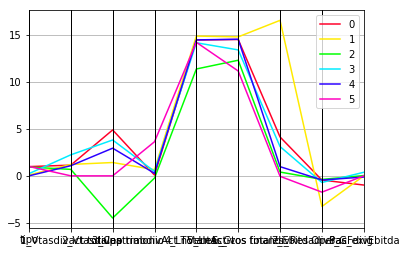

In [33]:
parallel_coordinates(centroides1.iloc[:,0:10], 'cluster',colormap='gist_rainbow')

### Puedo ver el detalle de la diferencia por cluster mirando un gráfico de cajas

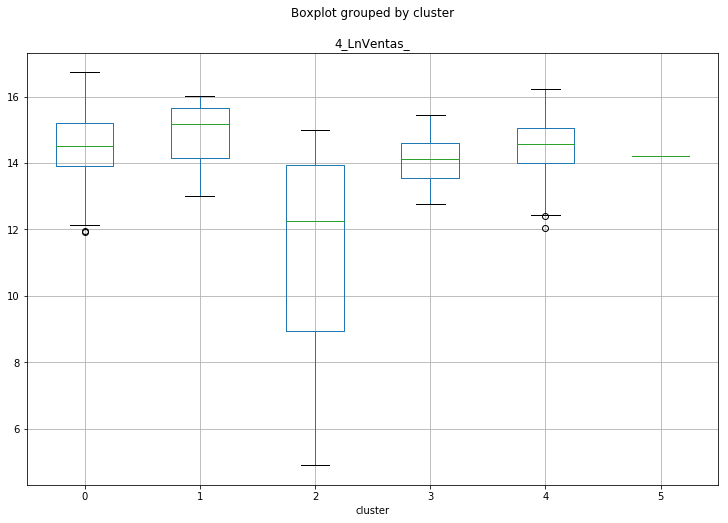

In [34]:
cdata.boxplot('4_LnVentas_',by='cluster',figsize=(12, 8))

### Serán estas diferencias estadísticamente significativas? son los clusters realmente diferentes unos de otros?
    Para eso necesito hacer un test - ANOVA

### Importo stats desde scipy que me permite hacer tests estadísticos

In [35]:
from scipy import stats

### Devuelve F y p-value

In [36]:
F, p = stats.f_oneway(cdata['4_LnVentas_'], cdata['cluster']) 

print(F,p)  

(6014.7170967855773, 3.2402902093389331e-257)


### Me gustaría testear todas las columnas de una sola vez
    Genero un for que ejecute el test columna a columna

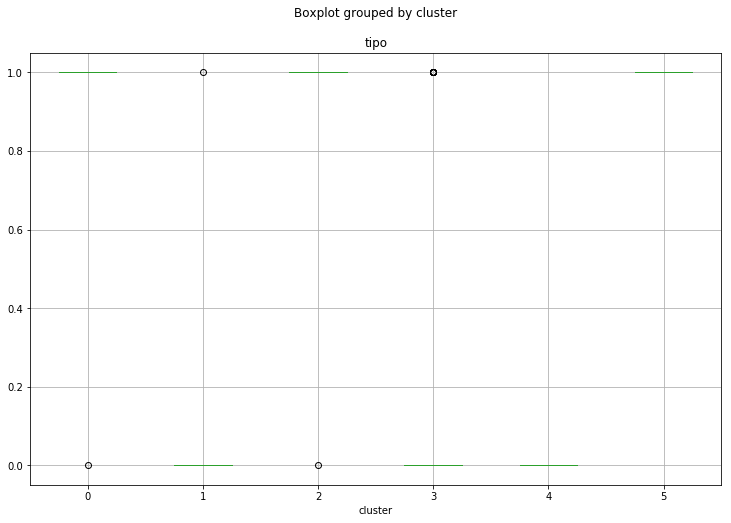

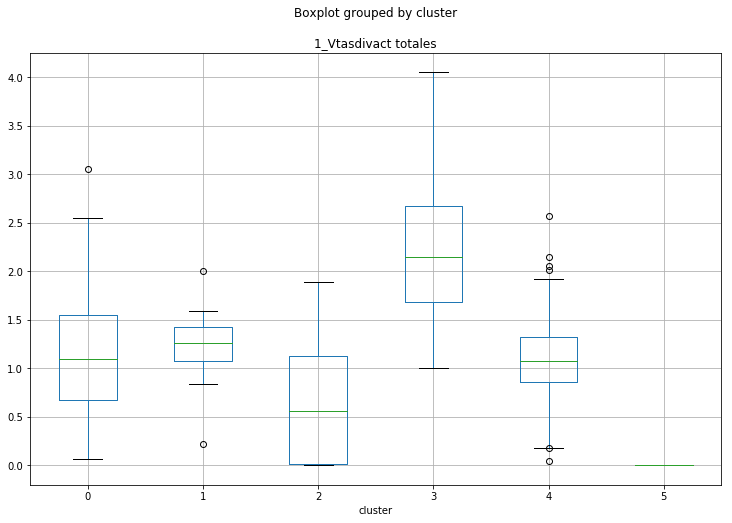

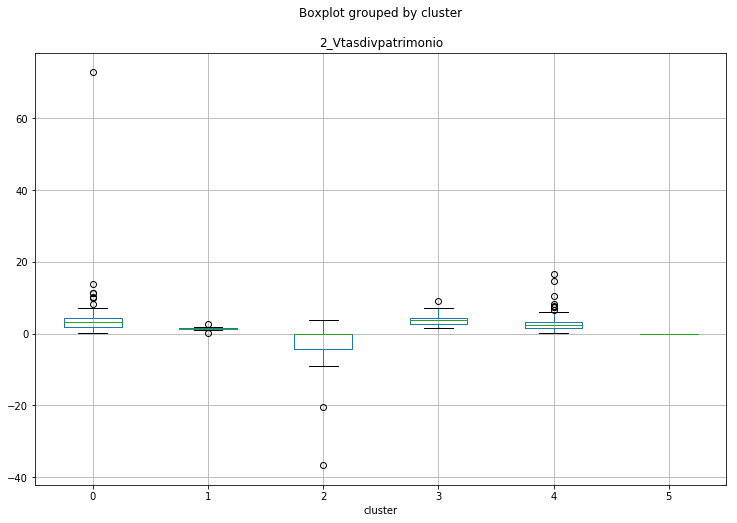

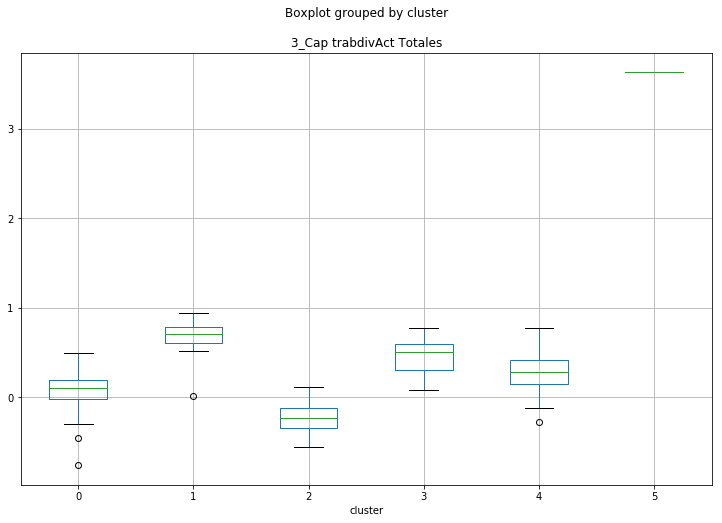

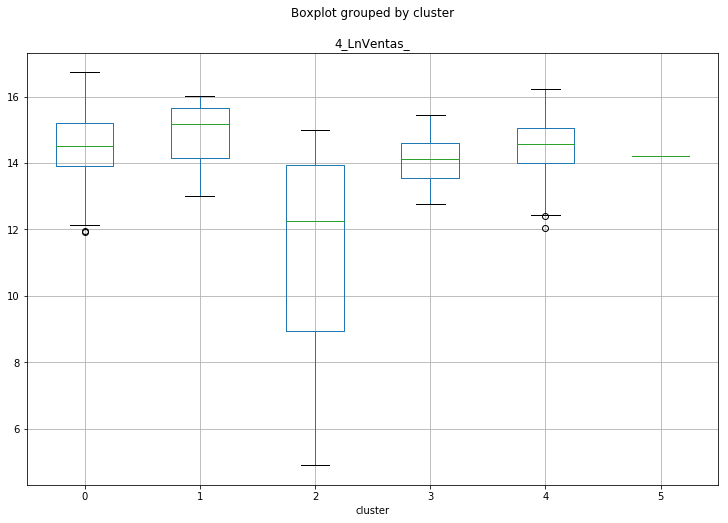

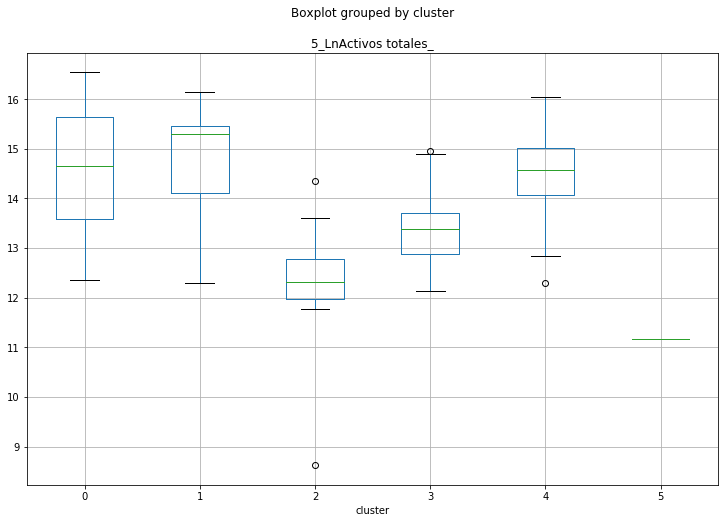

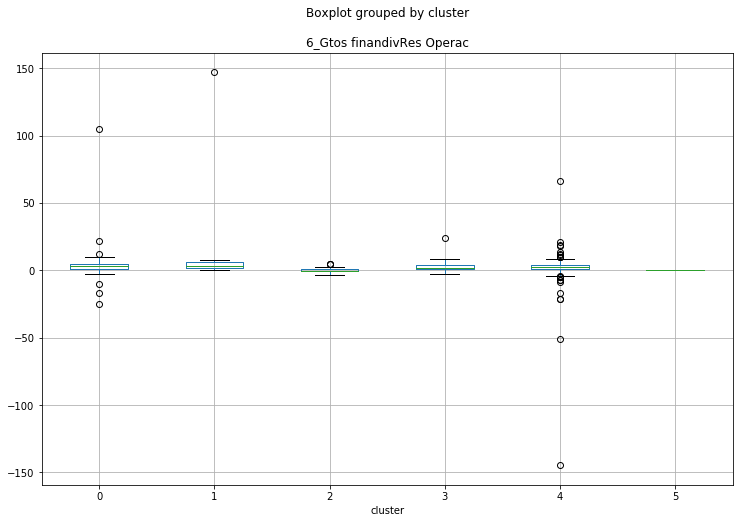

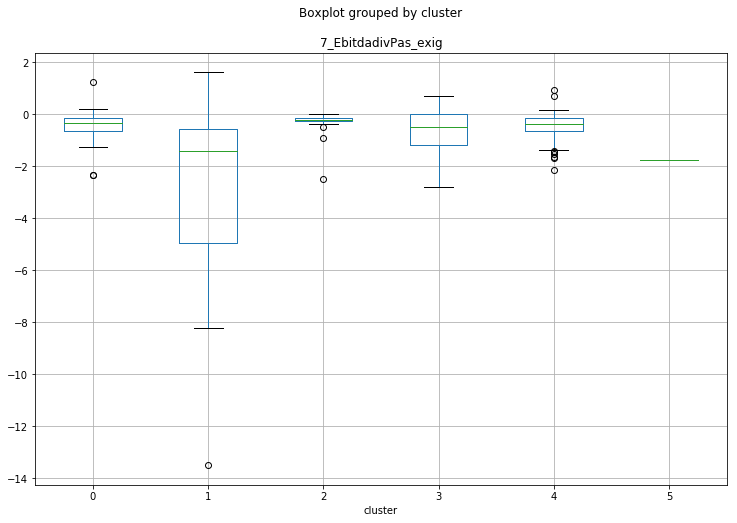

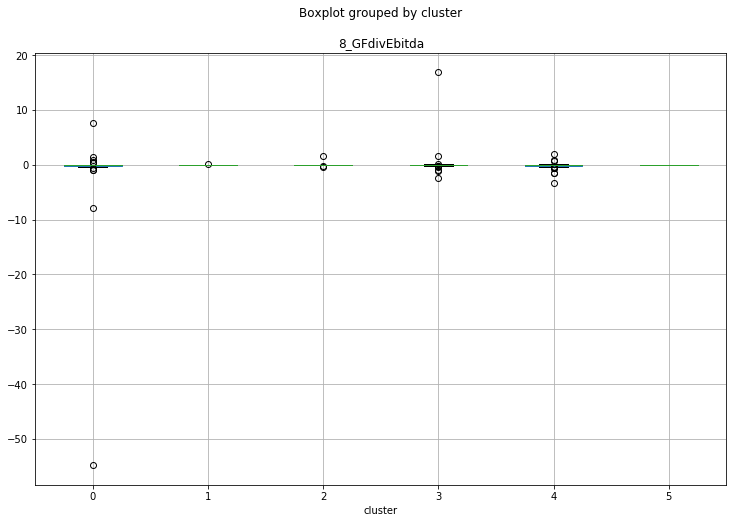

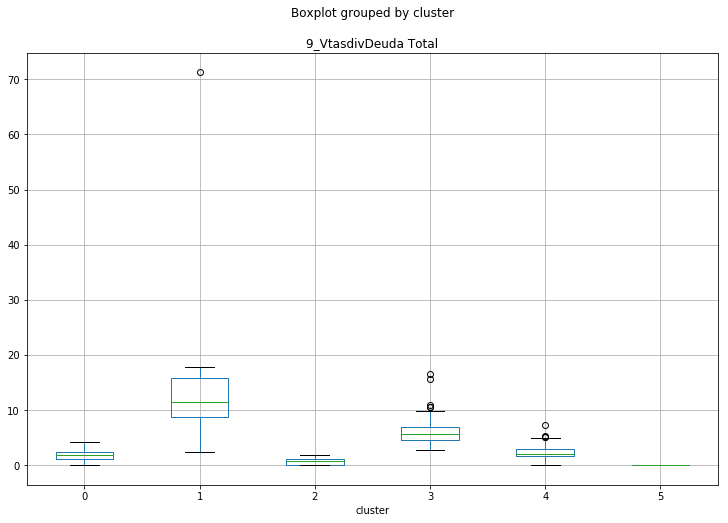

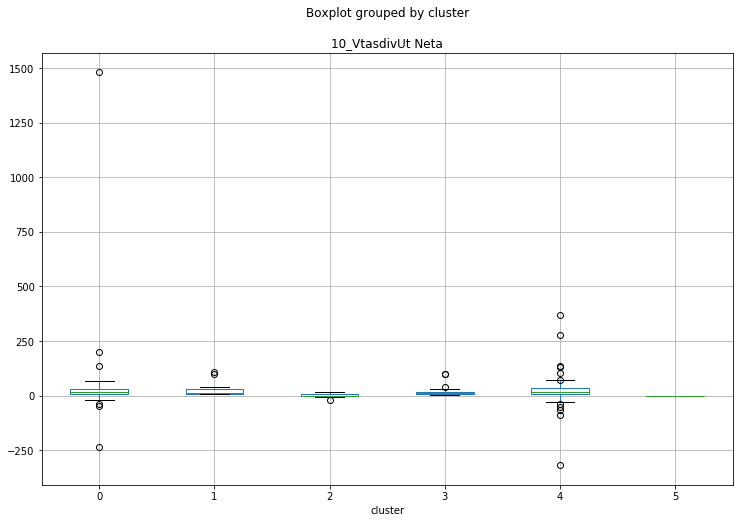

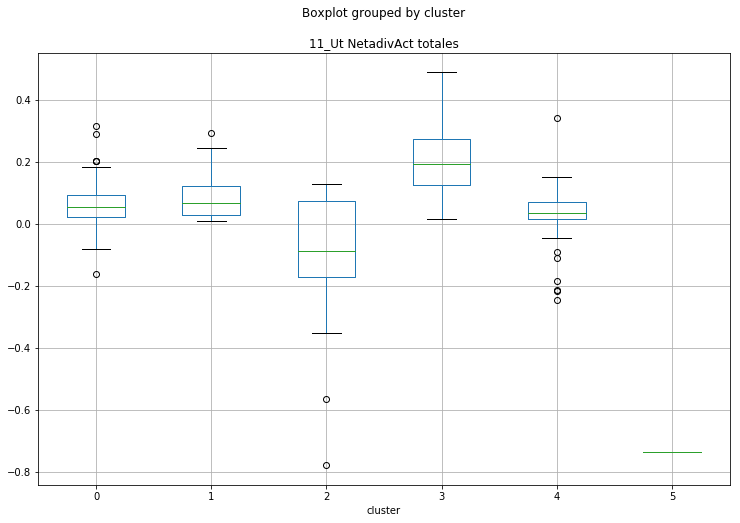

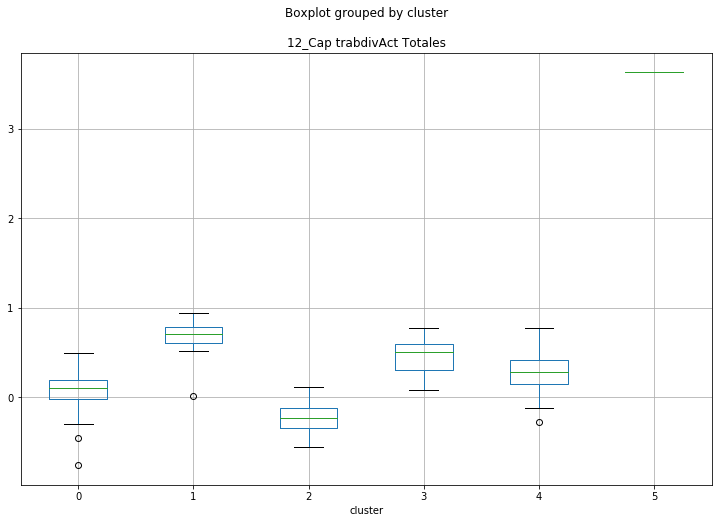

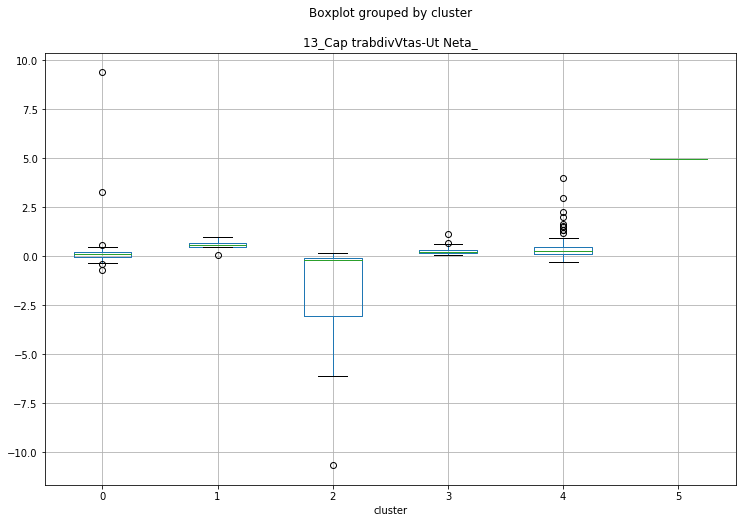

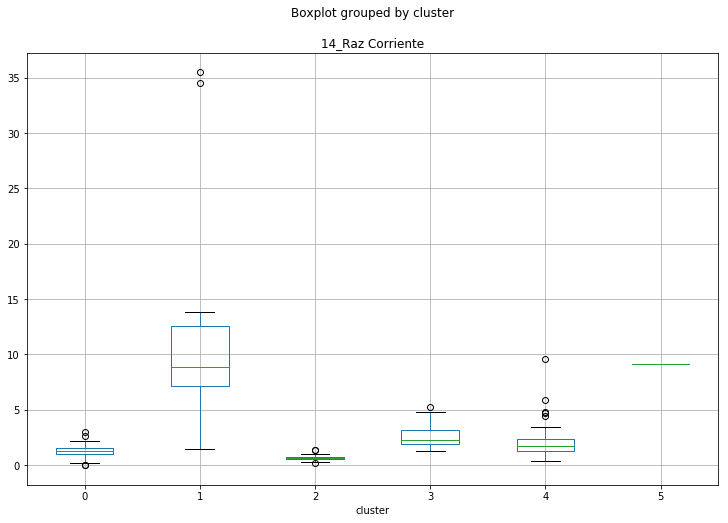

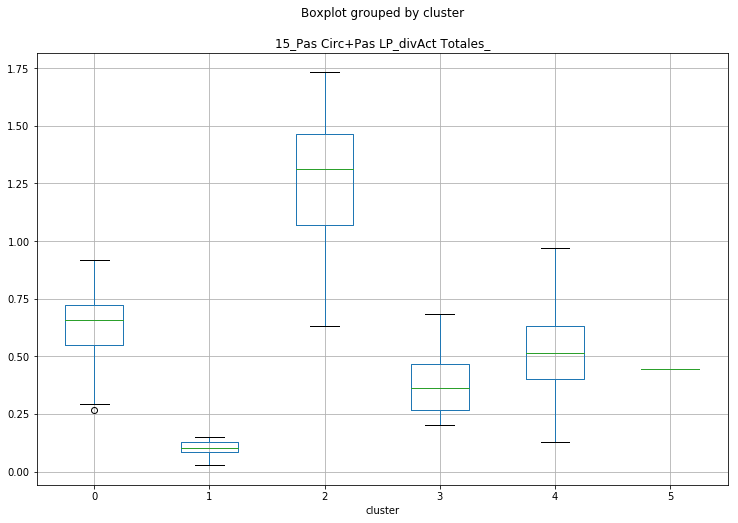

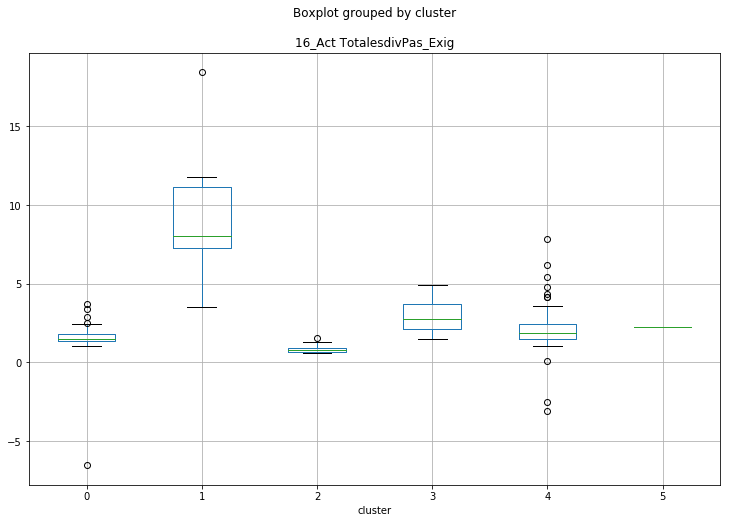

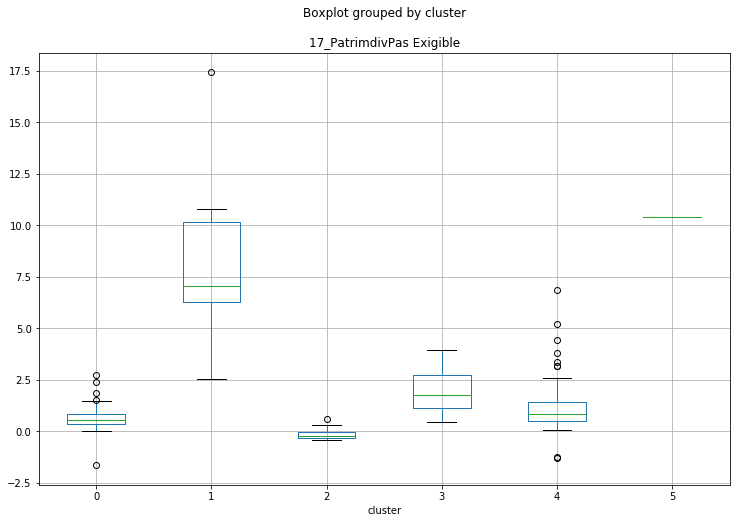

In [37]:
columnas=data.columns._data
x=0
anovas=[]

#para las columnas 1 al 19 en cdata testeo anova por cluster
for cols in cdata.iloc[:,1:19].columns:
    cdata.boxplot(cols,by='cluster',figsize=(12, 8))
    F, p = stats.f_oneway(cdata[cols], cdata['cluster']) 
    
    #voy guardando mi resultado en la matriz anovas
    anovas.append((columnas[x],F,p))
    x=x+1

### Genero el DF con los resultados

In [38]:
resultados=pd.DataFrame(data=anovas,columns=['Columna','F','p'])
resultados.to_excel('resultados_anova.xlsx')